# Predicting heart disease using Machine Learning (Sklearn,Pandas,Numpy,Matplotlib,etc...) 
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting wherther or not someone has heart disease or not based on their health info.

Steps : 
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## Problem Definition

In a statment
> Given Clinical parameter about a patient, can we predict whether or not the person have heart disease.

## Data

The origin data came from Cleavland data from the UCI Machine Learning Repo.
The data is also available in kaggle.

[Kaggle Data](https://www.kaggle.com/ronitf/heart-disease-uci)

[UCI Data](https://archive.ics.uci.edu/ml/datasets/heart+disease)

## Evaluation

> If we can reach 95% accuracy at predicting wheather or not a patient has heart disease during the proof of concept, we'll pursue the project.

## Features

This is where you'll get different information about each of the fetures in your data.

**Create data dictionary**

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [325]:
#

## Preparing the tools

We're going to use pandas,matplotlib and Numpy for data analysis.

In [1]:
# Import all the tools
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import f1_score,recall_score,precision_score,plot_roc_curve,plot_confusion_matrix,confusion_matrix,classification_report

### Load the Data

In [2]:
df = pd.read_csv("./data.csv")

In [3]:
df.shape # Rows # Coloums

(303, 14)

In [4]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

#### Data Exploaration (EDA)

* Find out more about the data. Be familiar with the data

1. What question(s) are you trying to solve ? 
2. What kind of data do we have and how do we treat different types ? 
3. What missing from the data and how do you deal with it ?
4. Where are the outliers and why should you care about them ? 
5. How can you add, change or remove features to get more out of your data ? 

In [5]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [6]:
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

In [7]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

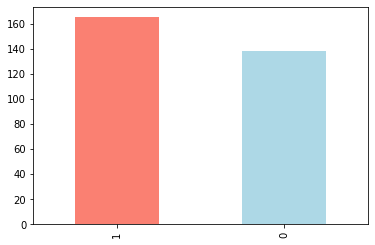

In [8]:
df['target'].value_counts().plot(kind='bar',color=['salmon','lightblue'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
data = df

In [12]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

<AxesSubplot:>

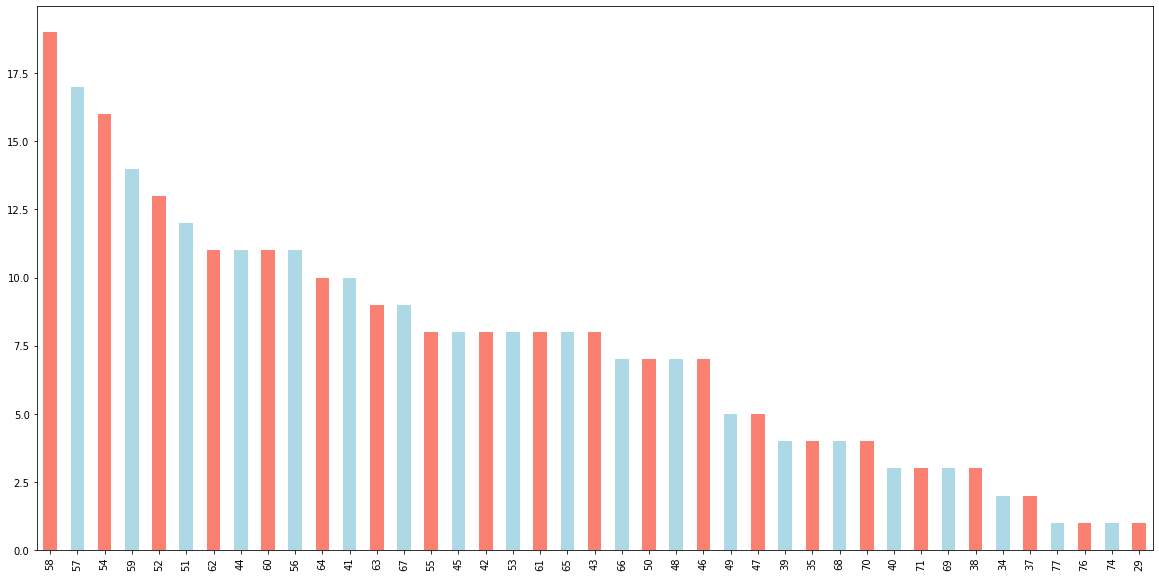

In [14]:
df['age'].value_counts().plot(kind='bar',color=['salmon','lightblue'],figsize=(20,10))

#### Heart disease Frequency according to Sex

In [15]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex'>

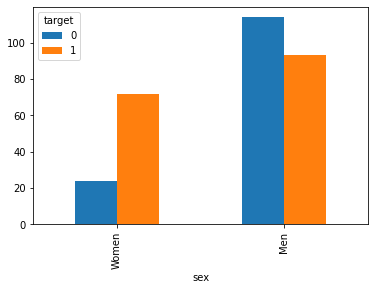

In [16]:
# Compare target coloum with sex coloumn
pd.crosstab(df.sex,df.target).rename({0:'Women',1:'Men'}).plot(kind='bar')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

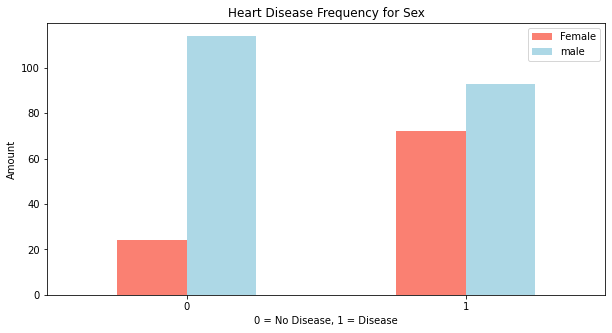

In [17]:
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,5),color=['salmon','lightblue'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female','male'])
plt.xticks(rotation=0)

In [18]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [19]:
df['thalach'].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

#### Age vs Max Heart Rate for Heart disease

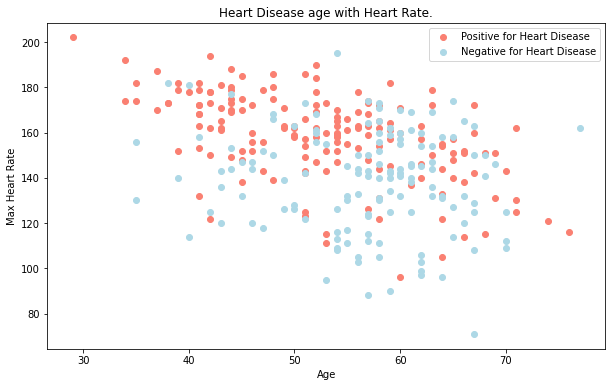

In [20]:
# Create another figure
plt.figure(figsize=(10,6))
# Scatter Positive
plt.scatter(df.age[df.target == 1],df.thalach[df.target == 1],c='salmon')
# Scatter Negative
plt.scatter(df.age[df.target == 0],df.thalach[df.target == 0],c='lightblue')
plt.legend(['Positive for Heart Disease','Negative for Heart Disease'])
plt.title('Heart Disease age with Heart Rate.')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate');

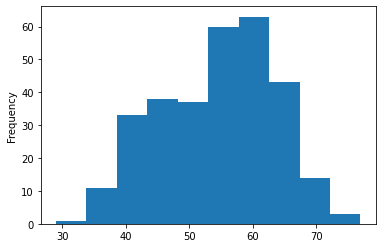

In [21]:
# Check the distrubution of the age coloum with histogram
df.age.plot.hist();

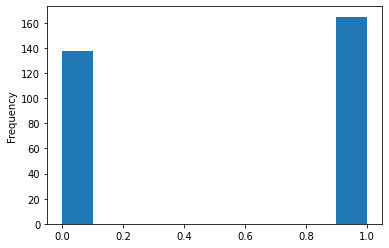

In [22]:
df.target.plot.hist();

In [23]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

<AxesSubplot:>

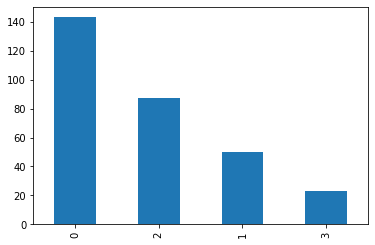

In [24]:
df.cp.value_counts().plot.bar()

### Heart disease frequency per chest pain type

<AxesSubplot:xlabel='cp'>

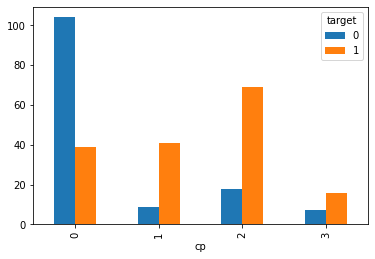

In [25]:
pd.crosstab(df.cp,df.target).plot.bar()

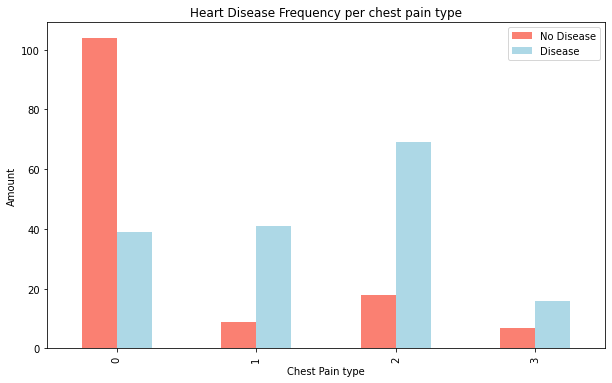

In [26]:
# Make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,6),color=['salmon','lightblue'])
# Add some communication
plt.title('Heart Disease Frequency per chest pain type')
plt.xlabel('Chest Pain type')
plt.ylabel('Amount')
plt.legend(['No Disease','Disease'])
plt.savefig('lol.png')

In [27]:
df.head(1)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   

   ca  thal  target  
0   0     1       1

In [28]:
# Make a correlation matrix
df.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
target   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trestbps -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalach   0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exang    -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slope     0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
ca       -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thal     -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
target    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

              thal    target  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trestbps  0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalach  -0.096439  0.421741  
exang     0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slope    -0.104764  0.345877  
ca        0.151832 -0.391724  
thal      1.000000 -0.344029  
target   -0.344029  1.000000

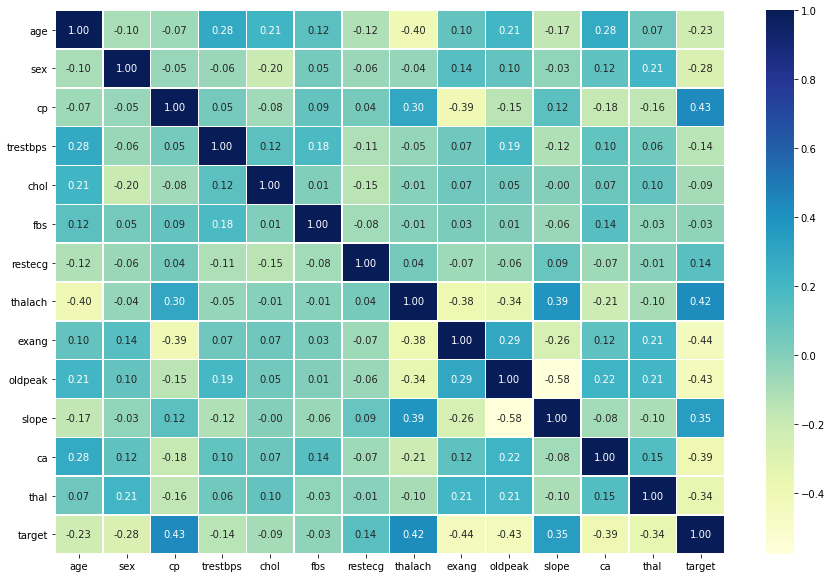

In [29]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt='.2f',cmap='YlGnBu')

## Modeling

In [30]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [31]:
for _ in range(250):
    df = df.sample(frac=1)
X = data.drop('target',axis=1)
y = data['target']

In [32]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [33]:
X

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0     2  
3        2   0     2  
4        2   0     2  
..     ...  ..   ...  
298      1   0     3  
299      1   0     3  
300      1   2     3  
301      1   1     3  
302      1   1     2  

[303 rows x 13 columns]

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [35]:
X_train

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
68    44    1   1       120   220    0        1      170      0      0.0   
267   49    1   2       118   149    0        0      126      0      0.8   
89    58    0   0       100   248    0        0      122      0      1.0   
201   60    1   0       125   258    0        0      141      1      2.8   
292   58    0   0       170   225    1        0      146      1      2.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
235   51    1   0       140   299    0        1      173      1      1.6   
41    48    1   1       130   245    0        0      180      0      0.2   
202   58    1   0       150   270    0        0      111      1      0.8   
3     56    1   1       120   236    0        1      178      0      0.8   
34    51    1   3       125   213    0        0      125      1      1.4   

     slope  ca  thal  
68       2   0     2  
267      2   3     2  
89       1   0     2  
201      1   1     3  
292      1   2     1  
..     ...  ..   ...  
235      2   0     3  
41       1   0     2  
202      2   0     3  
3        2   0     2  
34       2   1     2  

[227 rows x 13 columns]

In [36]:
y_train

68     1
267    0
89     1
201    0
292    0
      ..
235    0
41     1
202    0
3      1
34     1
Name: target, Length: 227, dtype: int64

Now we got our data split in to training and test sets. it time to train it.
 
We'll train it and find the patterns in the training set.

We are going to try  different machine learning models: 
1. Logistic Regression 
2. KNN Classifier
3. Random Forrest Classifier

In [37]:
from sklearn.linear_model import Lasso,LassoLars
from sklearn.naive_bayes import GaussianNB
# Put models in a dict
models = {'Logistic Regression':LogisticRegression(),
          'KNN Classifer':KNeighborsClassifier(),
          'Random Forrest Classifier':RandomForestClassifier(),
          'GaussianNB Classifier':GaussianNB(),
         }
# Creat a funtion to fit the model and score the model
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates give given machine learning models : a dict of different sklearn ML models.
    X_train : training data *Input*
    X_test : testing data *Input*
    y_test : testing data *Output*
    y_train : training data *Output*
    """
    model_scores = {}
    for name,model in models.items():
        # Fit the model to data
        model.fit(X_train,y_train)
        # Evaluate the model
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [38]:
model_scores = fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
new_model_scores_values = []
for value in model_scores.values():
    new_model_scores_values.append(value*100)
new_model_scores = {}
for keys,vals in zip(model_scores.keys(),new_model_scores_values):
    new_model_scores[keys] = vals
model_scores = new_model_scores

/home/ranuga/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
model_scores

{'Logistic Regression': 80.26315789473685,
 'KNN Classifer': 63.1578947368421,
 'Random Forrest Classifier': 78.94736842105263,
 'GaussianNB Classifier': 80.26315789473685}

Text(0, 0.5, 'Accuracy (%)')

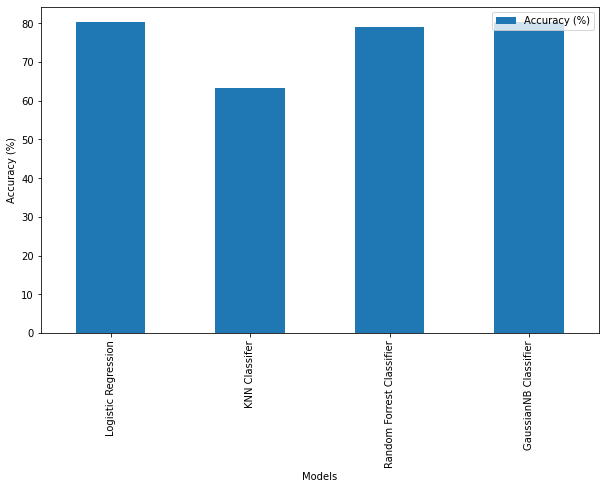

In [40]:
model_scores_df = pd.DataFrame(model_scores,index=['Accuracy (%)'])
model_scores_df.T.plot.bar(figsize=(10,6))
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')

Now we've got a baseline model and we know a model's first predictions arent always the best so what should we do ? 
Lets look at the following:

* Hypeyterparameter tuning
* Feature importance
* Confusion Matrix
* Cross Validation
* Precision
* Recall
* F1 Score
* Classification report
* ROC Curve
* AUC

## Hyper Param tunning

In [41]:
# Lets tune KNN
train_scores = []
test_scores = []
# Create a list of different values for KNN(n_neighbours)
neighbours = range(1,26)
# Setup KNN
knn = KNeighborsClassifier()
# Loop through different n_neighbours
for i in neighbours:
    knn.set_params(n_neighbors=i)
    # Fit the algorithm
    knn.fit(X_train,y_train)
    # Update the training score list
    train_scores.append(knn.score(X_train,y_train))
    # Update the test scores_list
    test_scores.append(knn.score(X_test,y_test))

In [42]:
train_scores

[1.0,
 0.801762114537445,
 0.801762114537445,
 0.788546255506608,
 0.7973568281938326,
 0.775330396475771,
 0.775330396475771,
 0.748898678414097,
 0.7533039647577092,
 0.748898678414097,
 0.7136563876651982,
 0.6960352422907489,
 0.7004405286343612,
 0.6960352422907489,
 0.6916299559471366,
 0.7004405286343612,
 0.6828193832599119,
 0.6828193832599119,
 0.7092511013215859,
 0.6828193832599119,
 0.6828193832599119,
 0.6828193832599119,
 0.6740088105726872,
 0.6651982378854625,
 0.6784140969162996]

In [43]:
test_scores

[0.6052631578947368,
 0.5263157894736842,
 0.6052631578947368,
 0.618421052631579,
 0.631578947368421,
 0.6842105263157895,
 0.6842105263157895,
 0.6578947368421053,
 0.6973684210526315,
 0.7236842105263158,
 0.75,
 0.75,
 0.75,
 0.75,
 0.7763157894736842,
 0.7631578947368421,
 0.75,
 0.7236842105263158,
 0.7236842105263158,
 0.75,
 0.7631578947368421,
 0.75,
 0.7368421052631579,
 0.7631578947368421,
 0.7368421052631579]

Max KNN Score on test data : 77.63


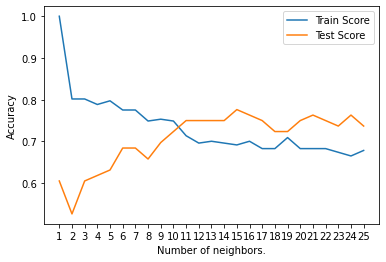

In [44]:
plt.plot(neighbours,train_scores,label='Train Score')
plt.plot(neighbours,test_scores,label='Test Score')
plt.xlabel('Number of neighbors.')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(neighbours)
print(f'Max KNN Score on test data : {max(test_scores)*100:.2f}')

In [45]:
!ls

data.csv  end-to-end-heart-disease-classification.ipynb  lol.png


## Hyper param tunning with RandomizedSearchCV

**RIP KNN :(**

We're going to tune: 
* LogiticRegression()
* RandomForrestClassifier()

... using RandomSearchCV

In [46]:
# LR grid
log_reg_grid = {
    "C":np.logspace(-4,4,25),
    'solver':['liblinear']
}

# RF Grid
rf_grid = {
    'n_estimators':np.arange(10,100,50),
    'max_depth':[None,3,5,10],
    'min_samples_split':np.arange(2,20,2),
    'min_samples_leaf':np.arange(1,20,2)
}

Now we got hyperparams grids for all models.

In [47]:
# Tune LogisticRegression
# Setup random hyperparams search for LR
rs_lof_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=50,
                                n_iter=25,
                                verbose=5
                               )
rs_lof_reg.fit(X_train,y_train)

Fitting 50 folds for each of 25 candidates, totalling 1250 fits
[CV] solver=liblinear, C=0.0001 ......................................
[CV] .......... solver=liblinear, C=0.0001, score=0.400, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] .......... solver=liblinear, C=0.0001, score=0.800, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] .......... solver=liblinear, C=0.0001, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] .......... solver=liblinear, C=0.0001, score=0.400, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] .......... solver=liblinear, C=0.0001, score=0.600, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] .......... solver=liblinear, C=0.0001, score=0.600, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] .......... solver=liblinear, C=0.0001, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] .......... solver=liblinear, C=0.0001, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] .......... solver=liblinear, C=0.0001, score=0.750, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] .......... solver=liblinear, C=0.0001, score=0.500, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] .......... solver=liblinear, C=0.0001, score=0.500, total=   0.0s
[CV] solver=liblinear, C=0.00021544346900318845 ......................
[CV]  solver=liblinear, C=0.00021544346900318845, score=0.400, total=   0.0s
[CV] solver=liblinear, C=0.00021544346900318845 ......................
[CV]  solver=liblinear, C=0.00021544346900318845, score=0.800, total=   0.0s
[CV] solver=liblinear, C=0.00021544346900318845 .................

[CV]  solver=liblinear, C=0.00046415888336127773, score=0.750, total=   0.0s
[CV] solver=liblinear, C=0.00046415888336127773 ......................
[CV]  solver=liblinear, C=0.00046415888336127773, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.00046415888336127773 ......................
[CV]  solver=liblinear, C=0.00046415888336127773, score=0.500, total=   0.0s
[CV] solver=liblinear, C=0.00046415888336127773 ......................
[CV]  solver=liblinear, C=0.00046415888336127773, score=0.750, total=   0.0s
[CV] solver=liblinear, C=0.00046415888336127773 ......................
[CV]  solver=liblinear, C=0.00046415888336127773, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.00046415888336127773 ......................
[CV]  solver=liblinear, C=0.00046415888336127773, score=0.500, total=   0.0s
[CV] solver=liblinear, C=0.00046415888336127773 ......................
[CV]  solver=liblinear, C=0.00046415888336127773, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.00046415

[CV]  solver=liblinear, C=0.002154434690031882, score=0.800, total=   0.0s
[CV] solver=liblinear, C=0.002154434690031882 ........................
[CV]  solver=liblinear, C=0.002154434690031882, score=0.600, total=   0.0s
[CV] solver=liblinear, C=0.002154434690031882 ........................
[CV]  solver=liblinear, C=0.002154434690031882, score=0.500, total=   0.0s
[CV] solver=liblinear, C=0.002154434690031882 ........................
[CV]  solver=liblinear, C=0.002154434690031882, score=0.750, total=   0.0s
[CV] solver=liblinear, C=0.002154434690031882 ........................
[CV]  solver=liblinear, C=0.002154434690031882, score=0.750, total=   0.0s
[CV] solver=liblinear, C=0.002154434690031882 ........................
[CV]  solver=liblinear, C=0.002154434690031882, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.002154434690031882 ........................
[CV]  solver=liblinear, C=0.002154434690031882, score=0.750, total=   0.0s
[CV] solver=liblinear, C=0.002154434690031882 ...

[CV] ............ solver=liblinear, C=0.01, score=0.600, total=   0.0s
[CV] solver=liblinear, C=0.01 ........................................
[CV] ............ solver=liblinear, C=0.01, score=0.800, total=   0.0s
[CV] solver=liblinear, C=0.01 ........................................
[CV] ............ solver=liblinear, C=0.01, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.01 ........................................
[CV] ............ solver=liblinear, C=0.01, score=0.800, total=   0.0s
[CV] solver=liblinear, C=0.01 ........................................
[CV] ............ solver=liblinear, C=0.01, score=0.600, total=   0.0s
[CV] solver=liblinear, C=0.01 ........................................
[CV] ............ solver=liblinear, C=0.01, score=0.800, total=   0.0s
[CV] solver=liblinear, C=0.01 ........................................
[CV] ............ solver=liblinear, C=0.01, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.01 ........................................
[CV] .

[CV]  solver=liblinear, C=0.021544346900318822, score=0.750, total=   0.0s
[CV] solver=liblinear, C=0.021544346900318822 ........................
[CV]  solver=liblinear, C=0.021544346900318822, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.021544346900318822 ........................
[CV]  solver=liblinear, C=0.021544346900318822, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.021544346900318822 ........................
[CV]  solver=liblinear, C=0.021544346900318822, score=0.750, total=   0.0s
[CV] solver=liblinear, C=0.021544346900318822 ........................
[CV]  solver=liblinear, C=0.021544346900318822, score=0.500, total=   0.0s
[CV] solver=liblinear, C=0.021544346900318822 ........................
[CV]  solver=liblinear, C=0.021544346900318822, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.046415888336127774 ........................
[CV]  solver=liblinear, C=0.046415888336127774, score=0.400, total=   0.0s
[CV] solver=liblinear, C=0.046415888336127774 ...

[CV] ............. solver=liblinear, C=0.1, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.1 .........................................
[CV] ............. solver=liblinear, C=0.1, score=0.750, total=   0.0s
[CV] solver=liblinear, C=0.1 .........................................
[CV] ............. solver=liblinear, C=0.1, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.1 .........................................
[CV] ............. solver=liblinear, C=0.1, score=0.750, total=   0.0s
[CV] solver=liblinear, C=0.1 .........................................
[CV] ............. solver=liblinear, C=0.1, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.1 .........................................
[CV] ............. solver=liblinear, C=0.1, score=0.750, total=   0.0s
[CV] solver=liblinear, C=0.1 .........................................
[CV] ............. solver=liblinear, C=0.1, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.1 .........................................
[CV] .

[CV]  solver=liblinear, C=0.46415888336127775, score=0.800, total=   0.0s
[CV] solver=liblinear, C=0.46415888336127775 .........................
[CV]  solver=liblinear, C=0.46415888336127775, score=0.600, total=   0.0s
[CV] solver=liblinear, C=0.46415888336127775 .........................
[CV]  solver=liblinear, C=0.46415888336127775, score=0.800, total=   0.0s
[CV] solver=liblinear, C=0.46415888336127775 .........................
[CV]  solver=liblinear, C=0.46415888336127775, score=0.800, total=   0.0s
[CV] solver=liblinear, C=0.46415888336127775 .........................
[CV]  solver=liblinear, C=0.46415888336127775, score=0.600, total=   0.0s
[CV] solver=liblinear, C=0.46415888336127775 .........................
[CV]  solver=liblinear, C=0.46415888336127775, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.46415888336127775 .........................
[CV]  solver=liblinear, C=0.46415888336127775, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.46415888336127775 ...........

[CV]  solver=liblinear, C=2.154434690031882, score=1.000, total=   0.0s
[CV] solver=liblinear, C=2.154434690031882 ...........................
[CV]  solver=liblinear, C=2.154434690031882, score=0.800, total=   0.0s
[CV] solver=liblinear, C=2.154434690031882 ...........................
[CV]  solver=liblinear, C=2.154434690031882, score=1.000, total=   0.0s
[CV] solver=liblinear, C=2.154434690031882 ...........................
[CV]  solver=liblinear, C=2.154434690031882, score=0.800, total=   0.0s
[CV] solver=liblinear, C=2.154434690031882 ...........................
[CV]  solver=liblinear, C=2.154434690031882, score=0.600, total=   0.0s
[CV] solver=liblinear, C=2.154434690031882 ...........................
[CV]  solver=liblinear, C=2.154434690031882, score=0.800, total=   0.0s
[CV] solver=liblinear, C=2.154434690031882 ...........................
[CV]  solver=liblinear, C=2.154434690031882, score=1.000, total=   0.0s
[CV] solver=liblinear, C=2.154434690031882 ...........................

[CV]  solver=liblinear, C=4.641588833612772, score=0.750, total=   0.0s
[CV] solver=liblinear, C=4.641588833612772 ...........................
[CV]  solver=liblinear, C=4.641588833612772, score=0.500, total=   0.0s
[CV] solver=liblinear, C=4.641588833612772 ...........................
[CV]  solver=liblinear, C=4.641588833612772, score=1.000, total=   0.0s
[CV] solver=liblinear, C=4.641588833612772 ...........................
[CV]  solver=liblinear, C=4.641588833612772, score=0.750, total=   0.0s
[CV] solver=liblinear, C=4.641588833612772 ...........................
[CV]  solver=liblinear, C=4.641588833612772, score=0.750, total=   0.0s
[CV] solver=liblinear, C=4.641588833612772 ...........................
[CV]  solver=liblinear, C=4.641588833612772, score=1.000, total=   0.0s
[CV] solver=liblinear, C=4.641588833612772 ...........................
[CV]  solver=liblinear, C=4.641588833612772, score=1.000, total=   0.0s
[CV] solver=liblinear, C=4.641588833612772 ...........................

[CV]  solver=liblinear, C=21.54434690031882, score=1.000, total=   0.0s
[CV] solver=liblinear, C=21.54434690031882 ...........................
[CV]  solver=liblinear, C=21.54434690031882, score=0.600, total=   0.0s
[CV] solver=liblinear, C=21.54434690031882 ...........................
[CV]  solver=liblinear, C=21.54434690031882, score=0.600, total=   0.0s
[CV] solver=liblinear, C=21.54434690031882 ...........................
[CV]  solver=liblinear, C=21.54434690031882, score=0.800, total=   0.0s
[CV] solver=liblinear, C=21.54434690031882 ...........................
[CV]  solver=liblinear, C=21.54434690031882, score=0.800, total=   0.0s
[CV] solver=liblinear, C=21.54434690031882 ...........................
[CV]  solver=liblinear, C=21.54434690031882, score=0.800, total=   0.0s
[CV] solver=liblinear, C=21.54434690031882 ...........................
[CV]  solver=liblinear, C=21.54434690031882, score=1.000, total=   0.0s
[CV] solver=liblinear, C=21.54434690031882 ...........................

[CV] ........... solver=liblinear, C=100.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=100.0 .......................................
[CV] ........... solver=liblinear, C=100.0, score=0.600, total=   0.0s
[CV] solver=liblinear, C=100.0 .......................................
[CV] ........... solver=liblinear, C=100.0, score=0.800, total=   0.0s
[CV] solver=liblinear, C=100.0 .......................................
[CV] ........... solver=liblinear, C=100.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=100.0 .......................................
[CV] ........... solver=liblinear, C=100.0, score=0.600, total=   0.0s
[CV] solver=liblinear, C=100.0 .......................................
[CV] ........... solver=liblinear, C=100.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=100.0 .......................................
[CV] ........... solver=liblinear, C=100.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=100.0 .......................................
[CV] .

[CV]  solver=liblinear, C=215.44346900318823, score=0.750, total=   0.0s
[CV] solver=liblinear, C=215.44346900318823 ..........................
[CV]  solver=liblinear, C=215.44346900318823, score=0.750, total=   0.0s
[CV] solver=liblinear, C=215.44346900318823 ..........................
[CV]  solver=liblinear, C=215.44346900318823, score=0.750, total=   0.0s
[CV] solver=liblinear, C=215.44346900318823 ..........................
[CV]  solver=liblinear, C=215.44346900318823, score=1.000, total=   0.0s
[CV] solver=liblinear, C=215.44346900318823 ..........................
[CV]  solver=liblinear, C=215.44346900318823, score=0.750, total=   0.0s
[CV] solver=liblinear, C=215.44346900318823 ..........................
[CV]  solver=liblinear, C=215.44346900318823, score=1.000, total=   0.0s
[CV] solver=liblinear, C=215.44346900318823 ..........................
[CV]  solver=liblinear, C=215.44346900318823, score=0.750, total=   0.0s
[CV] solver=liblinear, C=215.44346900318823 ...................

[CV] .......... solver=liblinear, C=1000.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=1000.0 ......................................
[CV] .......... solver=liblinear, C=1000.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=1000.0 ......................................
[CV] .......... solver=liblinear, C=1000.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=1000.0 ......................................
[CV] .......... solver=liblinear, C=1000.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=1000.0 ......................................
[CV] .......... solver=liblinear, C=1000.0, score=0.600, total=   0.0s
[CV] solver=liblinear, C=1000.0 ......................................
[CV] .......... solver=liblinear, C=1000.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=1000.0 ......................................
[CV] .......... solver=liblinear, C=1000.0, score=0.800, total=   0.0s
[CV] solver=liblinear, C=1000.0 ......................................
[CV] .

[CV]  solver=liblinear, C=2154.4346900318824, score=0.500, total=   0.0s
[CV] solver=liblinear, C=2154.4346900318824 ..........................
[CV]  solver=liblinear, C=2154.4346900318824, score=1.000, total=   0.0s
[CV] solver=liblinear, C=2154.4346900318824 ..........................
[CV]  solver=liblinear, C=2154.4346900318824, score=0.750, total=   0.0s
[CV] solver=liblinear, C=2154.4346900318824 ..........................
[CV]  solver=liblinear, C=2154.4346900318824, score=0.750, total=   0.0s
[CV] solver=liblinear, C=2154.4346900318824 ..........................
[CV]  solver=liblinear, C=2154.4346900318824, score=1.000, total=   0.0s
[CV] solver=liblinear, C=2154.4346900318824 ..........................
[CV]  solver=liblinear, C=2154.4346900318824, score=1.000, total=   0.0s
[CV] solver=liblinear, C=2154.4346900318824 ..........................
[CV]  solver=liblinear, C=2154.4346900318824, score=0.750, total=   0.0s
[CV] solver=liblinear, C=2154.4346900318824 ...................

[CV] ......... solver=liblinear, C=10000.0, score=0.800, total=   0.0s
[CV] solver=liblinear, C=10000.0 .....................................
[CV] ......... solver=liblinear, C=10000.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=10000.0 .....................................
[CV] ......... solver=liblinear, C=10000.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=10000.0 .....................................
[CV] ......... solver=liblinear, C=10000.0, score=0.600, total=   0.0s
[CV] solver=liblinear, C=10000.0 .....................................
[CV] ......... solver=liblinear, C=10000.0, score=0.600, total=   0.0s
[CV] solver=liblinear, C=10000.0 .....................................
[CV] ......... solver=liblinear, C=10000.0, score=0.800, total=   0.0s
[CV] solver=liblinear, C=10000.0 .....................................
[CV] ......... solver=liblinear, C=10000.0, score=0.800, total=   0.0s
[CV] solver=liblinear, C=10000.0 .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 1250 out of 1250 | elapsed:    6.1s finished


RandomizedSearchCV(cv=50, estimator=LogisticRegression(), n_iter=25,
                   param_distributions={'C': array([1.00000000e-04, 2.15443469e-04, 4.64158883e-04, 1.00000000e-03,
       2.15443469e-03, 4.64158883e-03, 1.00000000e-02, 2.15443469e-02,
       4.64158883e-02, 1.00000000e-01, 2.15443469e-01, 4.64158883e-01,
       1.00000000e+00, 2.15443469e+00, 4.64158883e+00, 1.00000000e+01,
       2.15443469e+01, 4.64158883e+01, 1.00000000e+02, 2.15443469e+02,
       4.64158883e+02, 1.00000000e+03, 2.15443469e+03, 4.64158883e+03,
       1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=5)

In [48]:
rs_lof_reg.best_params_

{'solver': 'liblinear', 'C': 0.21544346900318823}

In [49]:
rs_lof_reg.best_params_
rs_lof_reg.score(X_test,y_test)

0.8157894736842105

Now we've tuned LR, lets do the same for RF.

In [50]:

rs_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,verbose=True,cv=5,n_iter=50)
rs_rf.fit(X_train,y_train)
print(rs_rf.best_estimator_)
print(rs_rf.best_score_)
print(rs_rf.score(X_test,y_test))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RandomForestClassifier(max_depth=3, min_samples_leaf=13, min_samples_split=6,
                       n_estimators=60)
0.8545893719806763
0.8026315789473685


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   12.6s finished


In [51]:
rs_rf.best_params_

{'n_estimators': 60,
 'min_samples_split': 6,
 'min_samples_leaf': 13,
 'max_depth': 3}

In [52]:
model_scores

{'Logistic Regression': 80.26315789473685,
 'KNN Classifer': 63.1578947368421,
 'Random Forrest Classifier': 78.94736842105263,
 'GaussianNB Classifier': 80.26315789473685}

In [53]:
# Tune LogisticRegression
# Setup random hyperparams search for LR
rs_lof_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=100,
                                n_iter=25,
                                verbose=5
                               )
rs_lof_reg.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting 100 folds for each of 25 candidates, totalling 2500 fits
[CV] solver=liblinear, C=0.0001 ......................................
[CV] .......... solver=liblinear, C=0.0001, score=0.333, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] .......... solver=liblinear, C=0.0001, score=0.333, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] .......... solver=liblinear, C=0.0001, score=0.667, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] .......... solver=liblinear, C=0.0001, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] .......... solver=liblinear, C=0.0001, score=0.667, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] .......... solver=liblinear, C=0.0001, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] .......

[CV] .......... solver=liblinear, C=0.0001, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] .......... solver=liblinear, C=0.0001, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] .......... solver=liblinear, C=0.0001, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] .......... solver=liblinear, C=0.0001, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] .......... solver=liblinear, C=0.0001, score=0.500, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] .......... solver=liblinear, C=0.0001, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] .......... solver=liblinear, C=0.0001, score=0.500, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] .

[CV]  solver=liblinear, C=0.00021544346900318845, score=0.667, total=   0.0s
[CV] solver=liblinear, C=0.00021544346900318845 ......................
[CV]  solver=liblinear, C=0.00021544346900318845, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.00021544346900318845 ......................
[CV]  solver=liblinear, C=0.00021544346900318845, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.00021544346900318845 ......................
[CV]  solver=liblinear, C=0.00021544346900318845, score=0.667, total=   0.0s
[CV] solver=liblinear, C=0.00021544346900318845 ......................
[CV]  solver=liblinear, C=0.00021544346900318845, score=0.500, total=   0.0s
[CV] solver=liblinear, C=0.00021544346900318845 ......................
[CV]  solver=liblinear, C=0.00021544346900318845, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.00021544346900318845 ......................
[CV]  solver=liblinear, C=0.00021544346900318845, score=0.000, total=   0.0s
[CV] solver=liblinear, C=0.00021544

[CV]  solver=liblinear, C=0.00021544346900318845, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.00021544346900318845 ......................
[CV]  solver=liblinear, C=0.00021544346900318845, score=0.000, total=   0.0s
[CV] solver=liblinear, C=0.00021544346900318845 ......................
[CV]  solver=liblinear, C=0.00021544346900318845, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.00021544346900318845 ......................
[CV]  solver=liblinear, C=0.00021544346900318845, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.00021544346900318845 ......................
[CV]  solver=liblinear, C=0.00021544346900318845, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.00021544346900318845 ......................
[CV]  solver=liblinear, C=0.00021544346900318845, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.00021544346900318845 ......................
[CV]  solver=liblinear, C=0.00021544346900318845, score=0.500, total=   0.0s
[CV] solver=liblinear, C=0.00021544

[CV]  solver=liblinear, C=0.00046415888336127773, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.00046415888336127773 ......................
[CV]  solver=liblinear, C=0.00046415888336127773, score=0.500, total=   0.0s
[CV] solver=liblinear, C=0.00046415888336127773 ......................
[CV]  solver=liblinear, C=0.00046415888336127773, score=0.000, total=   0.0s
[CV] solver=liblinear, C=0.00046415888336127773 ......................
[CV]  solver=liblinear, C=0.00046415888336127773, score=0.500, total=   0.0s
[CV] solver=liblinear, C=0.00046415888336127773 ......................
[CV]  solver=liblinear, C=0.00046415888336127773, score=0.500, total=   0.0s
[CV] solver=liblinear, C=0.00046415888336127773 ......................
[CV]  solver=liblinear, C=0.00046415888336127773, score=0.000, total=   0.0s
[CV] solver=liblinear, C=0.00046415888336127773 ......................
[CV]  solver=liblinear, C=0.00046415888336127773, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.00046415

[CV] ........... solver=liblinear, C=0.001, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.001 .......................................
[CV] ........... solver=liblinear, C=0.001, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.001 .......................................
[CV] ........... solver=liblinear, C=0.001, score=0.667, total=   0.0s
[CV] solver=liblinear, C=0.001 .......................................
[CV] ........... solver=liblinear, C=0.001, score=0.667, total=   0.0s
[CV] solver=liblinear, C=0.001 .......................................
[CV] ........... solver=liblinear, C=0.001, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.001 .......................................
[CV] ........... solver=liblinear, C=0.001, score=0.667, total=   0.0s
[CV] solver=liblinear, C=0.001 .......................................
[CV] ........... solver=liblinear, C=0.001, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.001 .......................................
[CV] .

[CV] ........... solver=liblinear, C=0.001, score=0.500, total=   0.0s
[CV] solver=liblinear, C=0.001 .......................................
[CV] ........... solver=liblinear, C=0.001, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.001 .......................................
[CV] ........... solver=liblinear, C=0.001, score=0.500, total=   0.0s
[CV] solver=liblinear, C=0.001 .......................................
[CV] ........... solver=liblinear, C=0.001, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.001 .......................................
[CV] ........... solver=liblinear, C=0.001, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.001 .......................................
[CV] ........... solver=liblinear, C=0.001, score=0.000, total=   0.0s
[CV] solver=liblinear, C=0.001 .......................................
[CV] ........... solver=liblinear, C=0.001, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.001 .......................................
[CV] .

[CV]  solver=liblinear, C=0.002154434690031882, score=0.500, total=   0.0s
[CV] solver=liblinear, C=0.002154434690031882 ........................
[CV]  solver=liblinear, C=0.002154434690031882, score=0.000, total=   0.0s
[CV] solver=liblinear, C=0.002154434690031882 ........................
[CV]  solver=liblinear, C=0.002154434690031882, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.002154434690031882 ........................
[CV]  solver=liblinear, C=0.002154434690031882, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.002154434690031882 ........................
[CV]  solver=liblinear, C=0.002154434690031882, score=0.500, total=   0.0s
[CV] solver=liblinear, C=0.002154434690031882 ........................
[CV]  solver=liblinear, C=0.002154434690031882, score=0.500, total=   0.0s
[CV] solver=liblinear, C=0.002154434690031882 ........................
[CV]  solver=liblinear, C=0.002154434690031882, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.002154434690031882 ...

[CV]  solver=liblinear, C=0.004641588833612777, score=0.000, total=   0.0s
[CV] solver=liblinear, C=0.004641588833612777 ........................
[CV]  solver=liblinear, C=0.004641588833612777, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.004641588833612777 ........................
[CV]  solver=liblinear, C=0.004641588833612777, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.004641588833612777 ........................
[CV]  solver=liblinear, C=0.004641588833612777, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.004641588833612777 ........................
[CV]  solver=liblinear, C=0.004641588833612777, score=0.667, total=   0.0s
[CV] solver=liblinear, C=0.004641588833612777 ........................
[CV]  solver=liblinear, C=0.004641588833612777, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.004641588833612777 ........................
[CV]  solver=liblinear, C=0.004641588833612777, score=0.667, total=   0.0s
[CV] solver=liblinear, C=0.004641588833612777 ...

[CV]  solver=liblinear, C=0.004641588833612777, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.004641588833612777 ........................
[CV]  solver=liblinear, C=0.004641588833612777, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.004641588833612777 ........................
[CV]  solver=liblinear, C=0.004641588833612777, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.004641588833612777 ........................
[CV]  solver=liblinear, C=0.004641588833612777, score=0.500, total=   0.0s
[CV] solver=liblinear, C=0.004641588833612777 ........................
[CV]  solver=liblinear, C=0.004641588833612777, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.004641588833612777 ........................
[CV]  solver=liblinear, C=0.004641588833612777, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.004641588833612777 ........................
[CV]  solver=liblinear, C=0.004641588833612777, score=0.500, total=   0.0s
[CV] solver=liblinear, C=0.004641588833612777 ...

[CV] ............ solver=liblinear, C=0.01, score=0.500, total=   0.0s
[CV] solver=liblinear, C=0.01 ........................................
[CV] ............ solver=liblinear, C=0.01, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.01 ........................................
[CV] ............ solver=liblinear, C=0.01, score=0.500, total=   0.0s
[CV] solver=liblinear, C=0.01 ........................................
[CV] ............ solver=liblinear, C=0.01, score=0.500, total=   0.0s
[CV] solver=liblinear, C=0.01 ........................................
[CV] ............ solver=liblinear, C=0.01, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.01 ........................................
[CV] ............ solver=liblinear, C=0.01, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.01 ........................................
[CV] ............ solver=liblinear, C=0.01, score=0.500, total=   0.0s
[CV] solver=liblinear, C=0.01 ........................................
[CV] .

[CV]  solver=liblinear, C=0.021544346900318822, score=0.500, total=   0.0s
[CV] solver=liblinear, C=0.021544346900318822 ........................
[CV]  solver=liblinear, C=0.021544346900318822, score=0.500, total=   0.0s
[CV] solver=liblinear, C=0.021544346900318822 ........................
[CV]  solver=liblinear, C=0.021544346900318822, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.021544346900318822 ........................
[CV]  solver=liblinear, C=0.021544346900318822, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.021544346900318822 ........................
[CV]  solver=liblinear, C=0.021544346900318822, score=0.500, total=   0.0s
[CV] solver=liblinear, C=0.021544346900318822 ........................
[CV]  solver=liblinear, C=0.021544346900318822, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.021544346900318822 ........................
[CV]  solver=liblinear, C=0.021544346900318822, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.021544346900318822 ...

[CV]  solver=liblinear, C=0.046415888336127774, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.046415888336127774 ........................
[CV]  solver=liblinear, C=0.046415888336127774, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.046415888336127774 ........................
[CV]  solver=liblinear, C=0.046415888336127774, score=0.667, total=   0.0s
[CV] solver=liblinear, C=0.046415888336127774 ........................
[CV]  solver=liblinear, C=0.046415888336127774, score=0.667, total=   0.0s
[CV] solver=liblinear, C=0.046415888336127774 ........................
[CV]  solver=liblinear, C=0.046415888336127774, score=0.667, total=   0.0s
[CV] solver=liblinear, C=0.046415888336127774 ........................
[CV]  solver=liblinear, C=0.046415888336127774, score=0.333, total=   0.0s
[CV] solver=liblinear, C=0.046415888336127774 ........................
[CV]  solver=liblinear, C=0.046415888336127774, score=0.667, total=   0.0s
[CV] solver=liblinear, C=0.046415888336127774 ...

[CV]  solver=liblinear, C=0.046415888336127774, score=0.500, total=   0.0s
[CV] solver=liblinear, C=0.046415888336127774 ........................
[CV]  solver=liblinear, C=0.046415888336127774, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.046415888336127774 ........................
[CV]  solver=liblinear, C=0.046415888336127774, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.046415888336127774 ........................
[CV]  solver=liblinear, C=0.046415888336127774, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.046415888336127774 ........................
[CV]  solver=liblinear, C=0.046415888336127774, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.046415888336127774 ........................
[CV]  solver=liblinear, C=0.046415888336127774, score=0.500, total=   0.0s
[CV] solver=liblinear, C=0.046415888336127774 ........................
[CV]  solver=liblinear, C=0.046415888336127774, score=0.500, total=   0.0s
[CV] solver=liblinear, C=0.046415888336127774 ...

[CV] ............. solver=liblinear, C=0.1, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.1 .........................................
[CV] ............. solver=liblinear, C=0.1, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.1 .........................................
[CV] ............. solver=liblinear, C=0.1, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.1 .........................................
[CV] ............. solver=liblinear, C=0.1, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.1 .........................................
[CV] ............. solver=liblinear, C=0.1, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.1 .........................................
[CV] ............. solver=liblinear, C=0.1, score=0.500, total=   0.0s
[CV] solver=liblinear, C=0.1 .........................................
[CV] ............. solver=liblinear, C=0.1, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.1 .........................................
[CV] .

[CV]  solver=liblinear, C=0.21544346900318823, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.21544346900318823 .........................
[CV]  solver=liblinear, C=0.21544346900318823, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.21544346900318823 .........................
[CV]  solver=liblinear, C=0.21544346900318823, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.21544346900318823 .........................
[CV]  solver=liblinear, C=0.21544346900318823, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.21544346900318823 .........................
[CV]  solver=liblinear, C=0.21544346900318823, score=0.000, total=   0.0s
[CV] solver=liblinear, C=0.21544346900318823 .........................
[CV]  solver=liblinear, C=0.21544346900318823, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.21544346900318823 .........................
[CV]  solver=liblinear, C=0.21544346900318823, score=0.500, total=   0.0s
[CV] solver=liblinear, C=0.21544346900318823 ...........

[CV]  solver=liblinear, C=0.46415888336127775, score=0.667, total=   0.0s
[CV] solver=liblinear, C=0.46415888336127775 .........................
[CV]  solver=liblinear, C=0.46415888336127775, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.46415888336127775 .........................
[CV]  solver=liblinear, C=0.46415888336127775, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.46415888336127775 .........................
[CV]  solver=liblinear, C=0.46415888336127775, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.46415888336127775 .........................
[CV]  solver=liblinear, C=0.46415888336127775, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.46415888336127775 .........................
[CV]  solver=liblinear, C=0.46415888336127775, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.46415888336127775 .........................
[CV]  solver=liblinear, C=0.46415888336127775, score=0.667, total=   0.0s
[CV] solver=liblinear, C=0.46415888336127775 ...........

[CV]  solver=liblinear, C=0.46415888336127775, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.46415888336127775 .........................
[CV]  solver=liblinear, C=0.46415888336127775, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.46415888336127775 .........................
[CV]  solver=liblinear, C=0.46415888336127775, score=0.500, total=   0.0s
[CV] solver=liblinear, C=0.46415888336127775 .........................
[CV]  solver=liblinear, C=0.46415888336127775, score=1.000, total=   0.0s
[CV] solver=liblinear, C=0.46415888336127775 .........................
[CV]  solver=liblinear, C=0.46415888336127775, score=0.000, total=   0.0s
[CV] solver=liblinear, C=0.46415888336127775 .........................
[CV]  solver=liblinear, C=0.46415888336127775, score=0.500, total=   0.0s
[CV] solver=liblinear, C=0.46415888336127775 .........................
[CV]  solver=liblinear, C=0.46415888336127775, score=0.500, total=   0.0s
[CV] solver=liblinear, C=0.46415888336127775 ...........

[CV] ............. solver=liblinear, C=1.0, score=0.500, total=   0.0s
[CV] solver=liblinear, C=1.0 .........................................
[CV] ............. solver=liblinear, C=1.0, score=0.500, total=   0.0s
[CV] solver=liblinear, C=1.0 .........................................
[CV] ............. solver=liblinear, C=1.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=1.0 .........................................
[CV] ............. solver=liblinear, C=1.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=1.0 .........................................
[CV] ............. solver=liblinear, C=1.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=1.0 .........................................
[CV] ............. solver=liblinear, C=1.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=1.0 .........................................
[CV] ............. solver=liblinear, C=1.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=1.0 .........................................
[CV] .

[CV]  solver=liblinear, C=2.154434690031882, score=0.667, total=   0.0s
[CV] solver=liblinear, C=2.154434690031882 ...........................
[CV]  solver=liblinear, C=2.154434690031882, score=1.000, total=   0.0s
[CV] solver=liblinear, C=2.154434690031882 ...........................
[CV]  solver=liblinear, C=2.154434690031882, score=0.667, total=   0.0s
[CV] solver=liblinear, C=2.154434690031882 ...........................
[CV]  solver=liblinear, C=2.154434690031882, score=1.000, total=   0.0s
[CV] solver=liblinear, C=2.154434690031882 ...........................
[CV]  solver=liblinear, C=2.154434690031882, score=1.000, total=   0.0s
[CV] solver=liblinear, C=2.154434690031882 ...........................
[CV]  solver=liblinear, C=2.154434690031882, score=1.000, total=   0.0s
[CV] solver=liblinear, C=2.154434690031882 ...........................
[CV]  solver=liblinear, C=2.154434690031882, score=1.000, total=   0.0s
[CV] solver=liblinear, C=2.154434690031882 ...........................

[CV]  solver=liblinear, C=2.154434690031882, score=1.000, total=   0.0s
[CV] solver=liblinear, C=2.154434690031882 ...........................
[CV]  solver=liblinear, C=2.154434690031882, score=1.000, total=   0.0s
[CV] solver=liblinear, C=2.154434690031882 ...........................
[CV]  solver=liblinear, C=2.154434690031882, score=1.000, total=   0.0s
[CV] solver=liblinear, C=2.154434690031882 ...........................
[CV]  solver=liblinear, C=2.154434690031882, score=0.500, total=   0.0s
[CV] solver=liblinear, C=2.154434690031882 ...........................
[CV]  solver=liblinear, C=2.154434690031882, score=0.500, total=   0.0s
[CV] solver=liblinear, C=2.154434690031882 ...........................
[CV]  solver=liblinear, C=2.154434690031882, score=1.000, total=   0.0s
[CV] solver=liblinear, C=2.154434690031882 ...........................
[CV]  solver=liblinear, C=2.154434690031882, score=1.000, total=   0.0s
[CV] solver=liblinear, C=2.154434690031882 ...........................

[CV]  solver=liblinear, C=4.641588833612772, score=1.000, total=   0.0s
[CV] solver=liblinear, C=4.641588833612772 ...........................
[CV]  solver=liblinear, C=4.641588833612772, score=1.000, total=   0.0s
[CV] solver=liblinear, C=4.641588833612772 ...........................
[CV]  solver=liblinear, C=4.641588833612772, score=0.500, total=   0.0s
[CV] solver=liblinear, C=4.641588833612772 ...........................
[CV]  solver=liblinear, C=4.641588833612772, score=1.000, total=   0.0s
[CV] solver=liblinear, C=4.641588833612772 ...........................
[CV]  solver=liblinear, C=4.641588833612772, score=1.000, total=   0.0s
[CV] solver=liblinear, C=4.641588833612772 ...........................
[CV]  solver=liblinear, C=4.641588833612772, score=1.000, total=   0.0s
[CV] solver=liblinear, C=4.641588833612772 ...........................
[CV]  solver=liblinear, C=4.641588833612772, score=1.000, total=   0.0s
[CV] solver=liblinear, C=4.641588833612772 ...........................

[CV] ............ solver=liblinear, C=10.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=10.0 ........................................
[CV] ............ solver=liblinear, C=10.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=10.0 ........................................
[CV] ............ solver=liblinear, C=10.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=10.0 ........................................
[CV] ............ solver=liblinear, C=10.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=10.0 ........................................
[CV] ............ solver=liblinear, C=10.0, score=0.667, total=   0.0s
[CV] solver=liblinear, C=10.0 ........................................
[CV] ............ solver=liblinear, C=10.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=10.0 ........................................
[CV] ............ solver=liblinear, C=10.0, score=0.667, total=   0.0s
[CV] solver=liblinear, C=10.0 ........................................
[CV] .

[CV] ............ solver=liblinear, C=10.0, score=0.500, total=   0.0s
[CV] solver=liblinear, C=10.0 ........................................
[CV] ............ solver=liblinear, C=10.0, score=0.500, total=   0.0s
[CV] solver=liblinear, C=10.0 ........................................
[CV] ............ solver=liblinear, C=10.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=10.0 ........................................
[CV] ............ solver=liblinear, C=10.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=10.0 ........................................
[CV] ............ solver=liblinear, C=10.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=10.0 ........................................
[CV] ............ solver=liblinear, C=10.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=10.0 ........................................
[CV] ............ solver=liblinear, C=10.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=10.0 ........................................
[CV] .

[CV]  solver=liblinear, C=21.54434690031882, score=1.000, total=   0.0s
[CV] solver=liblinear, C=21.54434690031882 ...........................
[CV]  solver=liblinear, C=21.54434690031882, score=1.000, total=   0.0s
[CV] solver=liblinear, C=21.54434690031882 ...........................
[CV]  solver=liblinear, C=21.54434690031882, score=0.500, total=   0.0s
[CV] solver=liblinear, C=21.54434690031882 ...........................
[CV]  solver=liblinear, C=21.54434690031882, score=1.000, total=   0.0s
[CV] solver=liblinear, C=21.54434690031882 ...........................
[CV]  solver=liblinear, C=21.54434690031882, score=1.000, total=   0.0s
[CV] solver=liblinear, C=21.54434690031882 ...........................
[CV]  solver=liblinear, C=21.54434690031882, score=1.000, total=   0.0s
[CV] solver=liblinear, C=21.54434690031882 ...........................
[CV]  solver=liblinear, C=21.54434690031882, score=1.000, total=   0.0s
[CV] solver=liblinear, C=21.54434690031882 ...........................

[CV]  solver=liblinear, C=46.41588833612773, score=0.667, total=   0.0s
[CV] solver=liblinear, C=46.41588833612773 ...........................
[CV]  solver=liblinear, C=46.41588833612773, score=0.667, total=   0.0s
[CV] solver=liblinear, C=46.41588833612773 ...........................
[CV]  solver=liblinear, C=46.41588833612773, score=1.000, total=   0.0s
[CV] solver=liblinear, C=46.41588833612773 ...........................
[CV]  solver=liblinear, C=46.41588833612773, score=1.000, total=   0.0s
[CV] solver=liblinear, C=46.41588833612773 ...........................
[CV]  solver=liblinear, C=46.41588833612773, score=1.000, total=   0.0s
[CV] solver=liblinear, C=46.41588833612773 ...........................
[CV]  solver=liblinear, C=46.41588833612773, score=1.000, total=   0.0s
[CV] solver=liblinear, C=46.41588833612773 ...........................
[CV]  solver=liblinear, C=46.41588833612773, score=1.000, total=   0.0s
[CV] solver=liblinear, C=46.41588833612773 ...........................

[CV]  solver=liblinear, C=46.41588833612773, score=0.500, total=   0.0s
[CV] solver=liblinear, C=46.41588833612773 ...........................
[CV]  solver=liblinear, C=46.41588833612773, score=1.000, total=   0.0s
[CV] solver=liblinear, C=46.41588833612773 ...........................
[CV]  solver=liblinear, C=46.41588833612773, score=0.500, total=   0.0s
[CV] solver=liblinear, C=46.41588833612773 ...........................
[CV]  solver=liblinear, C=46.41588833612773, score=0.500, total=   0.0s
[CV] solver=liblinear, C=46.41588833612773 ...........................
[CV]  solver=liblinear, C=46.41588833612773, score=1.000, total=   0.0s
[CV] solver=liblinear, C=46.41588833612773 ...........................
[CV]  solver=liblinear, C=46.41588833612773, score=0.500, total=   0.0s
[CV] solver=liblinear, C=46.41588833612773 ...........................
[CV]  solver=liblinear, C=46.41588833612773, score=1.000, total=   0.0s
[CV] solver=liblinear, C=46.41588833612773 ...........................

[CV] ........... solver=liblinear, C=100.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=100.0 .......................................
[CV] ........... solver=liblinear, C=100.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=100.0 .......................................
[CV] ........... solver=liblinear, C=100.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=100.0 .......................................
[CV] ........... solver=liblinear, C=100.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=100.0 .......................................
[CV] ........... solver=liblinear, C=100.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=100.0 .......................................
[CV] ........... solver=liblinear, C=100.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=100.0 .......................................
[CV] ........... solver=liblinear, C=100.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=100.0 .......................................
[CV] .

[CV]  solver=liblinear, C=215.44346900318823, score=1.000, total=   0.0s
[CV] solver=liblinear, C=215.44346900318823 ..........................
[CV]  solver=liblinear, C=215.44346900318823, score=1.000, total=   0.0s
[CV] solver=liblinear, C=215.44346900318823 ..........................
[CV]  solver=liblinear, C=215.44346900318823, score=1.000, total=   0.0s
[CV] solver=liblinear, C=215.44346900318823 ..........................
[CV]  solver=liblinear, C=215.44346900318823, score=1.000, total=   0.0s
[CV] solver=liblinear, C=215.44346900318823 ..........................
[CV]  solver=liblinear, C=215.44346900318823, score=1.000, total=   0.0s
[CV] solver=liblinear, C=215.44346900318823 ..........................
[CV]  solver=liblinear, C=215.44346900318823, score=0.500, total=   0.0s
[CV] solver=liblinear, C=215.44346900318823 ..........................
[CV]  solver=liblinear, C=215.44346900318823, score=0.500, total=   0.0s
[CV] solver=liblinear, C=215.44346900318823 ...................

[CV]  solver=liblinear, C=215.44346900318823, score=1.000, total=   0.0s
[CV] solver=liblinear, C=464.1588833612773 ...........................
[CV]  solver=liblinear, C=464.1588833612773, score=0.667, total=   0.0s
[CV] solver=liblinear, C=464.1588833612773 ...........................
[CV]  solver=liblinear, C=464.1588833612773, score=0.667, total=   0.0s
[CV] solver=liblinear, C=464.1588833612773 ...........................
[CV]  solver=liblinear, C=464.1588833612773, score=1.000, total=   0.0s
[CV] solver=liblinear, C=464.1588833612773 ...........................
[CV]  solver=liblinear, C=464.1588833612773, score=0.667, total=   0.0s
[CV] solver=liblinear, C=464.1588833612773 ...........................
[CV]  solver=liblinear, C=464.1588833612773, score=0.667, total=   0.0s
[CV] solver=liblinear, C=464.1588833612773 ...........................
[CV]  solver=liblinear, C=464.1588833612773, score=0.667, total=   0.0s
[CV] solver=liblinear, C=464.1588833612773 ..........................

[CV]  solver=liblinear, C=464.1588833612773, score=1.000, total=   0.0s
[CV] solver=liblinear, C=464.1588833612773 ...........................
[CV]  solver=liblinear, C=464.1588833612773, score=0.500, total=   0.0s
[CV] solver=liblinear, C=464.1588833612773 ...........................
[CV]  solver=liblinear, C=464.1588833612773, score=1.000, total=   0.0s
[CV] solver=liblinear, C=464.1588833612773 ...........................
[CV]  solver=liblinear, C=464.1588833612773, score=0.500, total=   0.0s
[CV] solver=liblinear, C=464.1588833612773 ...........................
[CV]  solver=liblinear, C=464.1588833612773, score=1.000, total=   0.0s
[CV] solver=liblinear, C=464.1588833612773 ...........................
[CV]  solver=liblinear, C=464.1588833612773, score=0.500, total=   0.0s
[CV] solver=liblinear, C=464.1588833612773 ...........................
[CV]  solver=liblinear, C=464.1588833612773, score=1.000, total=   0.0s
[CV] solver=liblinear, C=464.1588833612773 ...........................

[CV] .......... solver=liblinear, C=1000.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=1000.0 ......................................
[CV] .......... solver=liblinear, C=1000.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=1000.0 ......................................
[CV] .......... solver=liblinear, C=1000.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=1000.0 ......................................
[CV] .......... solver=liblinear, C=1000.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=1000.0 ......................................
[CV] .......... solver=liblinear, C=1000.0, score=0.500, total=   0.0s
[CV] solver=liblinear, C=1000.0 ......................................
[CV] .......... solver=liblinear, C=1000.0, score=0.500, total=   0.0s
[CV] solver=liblinear, C=1000.0 ......................................
[CV] .......... solver=liblinear, C=1000.0, score=0.500, total=   0.0s
[CV] solver=liblinear, C=1000.0 ......................................
[CV] .

[CV]  solver=liblinear, C=2154.4346900318824, score=1.000, total=   0.0s
[CV] solver=liblinear, C=2154.4346900318824 ..........................
[CV]  solver=liblinear, C=2154.4346900318824, score=0.667, total=   0.0s
[CV] solver=liblinear, C=2154.4346900318824 ..........................
[CV]  solver=liblinear, C=2154.4346900318824, score=1.000, total=   0.0s
[CV] solver=liblinear, C=2154.4346900318824 ..........................
[CV]  solver=liblinear, C=2154.4346900318824, score=1.000, total=   0.0s
[CV] solver=liblinear, C=2154.4346900318824 ..........................
[CV]  solver=liblinear, C=2154.4346900318824, score=1.000, total=   0.0s
[CV] solver=liblinear, C=2154.4346900318824 ..........................
[CV]  solver=liblinear, C=2154.4346900318824, score=1.000, total=   0.0s
[CV] solver=liblinear, C=2154.4346900318824 ..........................
[CV]  solver=liblinear, C=2154.4346900318824, score=0.667, total=   0.0s
[CV] solver=liblinear, C=2154.4346900318824 ...................

[CV]  solver=liblinear, C=2154.4346900318824, score=0.500, total=   0.0s
[CV] solver=liblinear, C=2154.4346900318824 ..........................
[CV]  solver=liblinear, C=2154.4346900318824, score=0.500, total=   0.0s
[CV] solver=liblinear, C=2154.4346900318824 ..........................
[CV]  solver=liblinear, C=2154.4346900318824, score=1.000, total=   0.0s
[CV] solver=liblinear, C=2154.4346900318824 ..........................
[CV]  solver=liblinear, C=2154.4346900318824, score=0.500, total=   0.0s
[CV] solver=liblinear, C=2154.4346900318824 ..........................
[CV]  solver=liblinear, C=2154.4346900318824, score=1.000, total=   0.0s
[CV] solver=liblinear, C=2154.4346900318824 ..........................
[CV]  solver=liblinear, C=2154.4346900318824, score=0.500, total=   0.0s
[CV] solver=liblinear, C=2154.4346900318824 ..........................
[CV]  solver=liblinear, C=2154.4346900318824, score=0.500, total=   0.0s
[CV] solver=liblinear, C=2154.4346900318824 ...................

[CV]  solver=liblinear, C=4641.588833612773, score=1.000, total=   0.0s
[CV] solver=liblinear, C=4641.588833612773 ...........................
[CV]  solver=liblinear, C=4641.588833612773, score=0.500, total=   0.0s
[CV] solver=liblinear, C=4641.588833612773 ...........................
[CV]  solver=liblinear, C=4641.588833612773, score=1.000, total=   0.0s
[CV] solver=liblinear, C=4641.588833612773 ...........................
[CV]  solver=liblinear, C=4641.588833612773, score=1.000, total=   0.0s
[CV] solver=liblinear, C=4641.588833612773 ...........................
[CV]  solver=liblinear, C=4641.588833612773, score=1.000, total=   0.0s
[CV] solver=liblinear, C=4641.588833612773 ...........................
[CV]  solver=liblinear, C=4641.588833612773, score=1.000, total=   0.0s
[CV] solver=liblinear, C=4641.588833612773 ...........................
[CV]  solver=liblinear, C=4641.588833612773, score=1.000, total=   0.0s
[CV] solver=liblinear, C=4641.588833612773 ...........................

[CV] ......... solver=liblinear, C=10000.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=10000.0 .....................................
[CV] ......... solver=liblinear, C=10000.0, score=0.667, total=   0.0s
[CV] solver=liblinear, C=10000.0 .....................................
[CV] ......... solver=liblinear, C=10000.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=10000.0 .....................................
[CV] ......... solver=liblinear, C=10000.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=10000.0 .....................................
[CV] ......... solver=liblinear, C=10000.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=10000.0 .....................................
[CV] ......... solver=liblinear, C=10000.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=10000.0 .....................................
[CV] ......... solver=liblinear, C=10000.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=10000.0 .....................................
[CV] .

[CV] ......... solver=liblinear, C=10000.0, score=0.500, total=   0.0s
[CV] solver=liblinear, C=10000.0 .....................................
[CV] ......... solver=liblinear, C=10000.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=10000.0 .....................................
[CV] ......... solver=liblinear, C=10000.0, score=0.500, total=   0.0s
[CV] solver=liblinear, C=10000.0 .....................................
[CV] ......... solver=liblinear, C=10000.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=10000.0 .....................................
[CV] ......... solver=liblinear, C=10000.0, score=0.500, total=   0.0s
[CV] solver=liblinear, C=10000.0 .....................................
[CV] ......... solver=liblinear, C=10000.0, score=0.500, total=   0.0s
[CV] solver=liblinear, C=10000.0 .....................................
[CV] ......... solver=liblinear, C=10000.0, score=1.000, total=   0.0s
[CV] solver=liblinear, C=10000.0 .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed:   15.2s finished


RandomizedSearchCV(cv=100, estimator=LogisticRegression(), n_iter=25,
                   param_distributions={'C': array([1.00000000e-04, 2.15443469e-04, 4.64158883e-04, 1.00000000e-03,
       2.15443469e-03, 4.64158883e-03, 1.00000000e-02, 2.15443469e-02,
       4.64158883e-02, 1.00000000e-01, 2.15443469e-01, 4.64158883e-01,
       1.00000000e+00, 2.15443469e+00, 4.64158883e+00, 1.00000000e+01,
       2.15443469e+01, 4.64158883e+01, 1.00000000e+02, 2.15443469e+02,
       4.64158883e+02, 1.00000000e+03, 2.15443469e+03, 4.64158883e+03,
       1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=5)

In [54]:
rs_lof_reg.best_params_
rs_lof_reg.score(X_test,y_test)

0.7894736842105263

# Hyeper param tunning with GrdiSearchCV
LR is the best. so we will try to improve it again.

In [55]:
# LR Grid GS-CV
log_reg_grid = {
    'C':np.logspace(-4,4,100),
    'solver':['liblinear']
}
# df = df.sample(frac=1)
# X = df.drop('target',axis=1)
# y = df['target']
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
gs_log_reg = GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=25,verbose=True)
gs_log_reg.fit(X_train,y_train)

Fitting 25 folds for each of 100 candidates, totalling 2500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed:   11.9s finished


GridSearchCV(cv=25, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.36448941e-03, 2.84803...
       1.38488637e+02, 1.66810054e+02, 2.00923300e+02, 2.42012826e+02,
       2.91505306e+02, 3.51119173e+02, 4.22924287e+02, 5.09413801e+02,
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [56]:
gs_log_reg.score(X_test,y_test)

0.8157894736842105

In [57]:
gs_log_reg.best_params_

{'C': 0.06734150657750829, 'solver': 'liblinear'}

## Evaluative our tuned ML Classifier.

* Roc Curve and AUC Score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-Score

... maybe croos-validation

To make comparision and evaluate our trained model,we first need to make predictions

In [58]:
# Make predictions
y_preds = gs_log_reg.predict(X_test)

In [59]:
from sklearn.model_selection import *
from sklearn.metrics import *

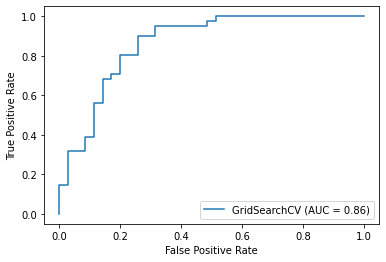

In [60]:
# Plot roc curve and calculate and AUC
plot_roc_curve(gs_log_reg,X_test,y_test)

In [61]:
# Confusion Matrix
confusion_matrix(y_test,y_preds)

array([[24, 11],
       [ 3, 38]])

In [62]:
from sklearn.metrics import plot_confusion_matrix

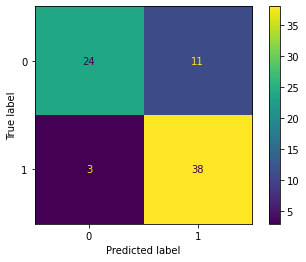

In [63]:
plot_confusion_matrix(gs_log_reg,X_test,y_test)

Now we've got a ROC curve and a AUC metrics and a confusion matrix,lets make a classification report and cross-val recision and recall and f1 score

In [64]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.69      0.77        35
           1       0.78      0.93      0.84        41

    accuracy                           0.82        76
   macro avg       0.83      0.81      0.81        76
weighted avg       0.83      0.82      0.81        76



In [65]:
# Precision is how well the model is answering the questions for each type of classification. The best score is 1.0
# Recall means there is no problem in confusion matrix. 0
# f1-score is how well does the classification types perform for each in the model
# support is the amount of data rows for each row or coloum,etc...

### Calcualate evaluation metrics using cv
We are going to calculate precision,reacll,f1-score of our model.
We will use `cross_val_score`

In [66]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.06734150657750829, 'solver': 'liblinear'}

In [67]:
# Create a new classifier with best params
clf = LogisticRegression(C=0.20565123083486536, solver='liblinear')

In [68]:
# Accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring='accuracy')
cv_acc = cv_acc.mean()
cv_acc

0.8479781420765027

In [69]:
# Precision
cv_precision = cross_val_score(clf,X,y,cv=5,scoring='precision')
cv_precision = cv_acc.mean()
cv_precision

0.8479781420765027

In [70]:
# Recall
cv_recall = cross_val_score(clf,X,y,cv=5,scoring='recall')
cv_recall = cv_acc.mean()
cv_recall

0.8479781420765027

In [71]:
# F1-Score
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring='f1')
cv_f1 = cv_acc.mean()
cv_f1

0.8479781420765027

In [73]:
# Visulaize cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy':cv_acc,'Precision':cv_precision,'Recall':cv_recall,'F1-Score':cv_f1},index=['Results'])

<AxesSubplot:title={'center':'Cross Val Classification metrics'}>

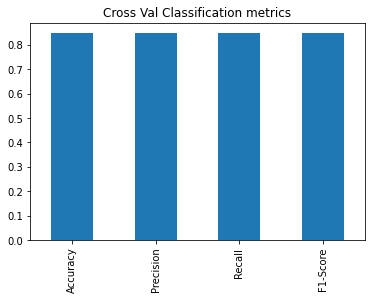

In [74]:
cv_metrics.T.plot.bar(title='Cross Val Classification metrics',legend=False)

## Feature Importance

Feature importance is another way of asking which features contributed most to the out comes of the model or which coloum did help out most to get all of the evaluation ????!

Finding feature importance is different for each ML model.

**Search (Model Name) feature Importance**

Lets find the feature important for our LR model...

In [77]:
# Fit an instance of LR
gs_log_reg.best_params_

{'C': 0.06734150657750829, 'solver': 'liblinear'}

In [78]:
clf = LogisticRegression(C=0.06734150657750829, solver='liblinear')
clf.fit(X_train,y_train)

LogisticRegression(C=0.06734150657750829, solver='liblinear')

In [81]:
clf.coef_

array([[ 0.00101907, -0.44158633,  0.6522025 , -0.0095923 , -0.00164235,
        -0.12275087,  0.17259354,  0.02060492, -0.39877184, -0.54814474,
         0.22791204, -0.40314732, -0.4360227 ]])

In [83]:
# Match coef_ of features to coloums
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))

In [84]:
feature_dict

{'age': 0.0010190735121057995,
 'sex': -0.44158633032856953,
 'cp': 0.6522024961958343,
 'trestbps': -0.009592303639053203,
 'chol': -0.001642346477253696,
 'fbs': -0.12275087478141884,
 'restecg': 0.17259353961968377,
 'thalach': 0.020604924011883546,
 'exang': -0.3987718442522987,
 'oldpeak': -0.5481447352694283,
 'slope': 0.22791204035318607,
 'ca': -0.403147322635645,
 'thal': -0.43602270239156043}

In [86]:
# Visulaize feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])

<AxesSubplot:title={'center':'Feature Importance'}>

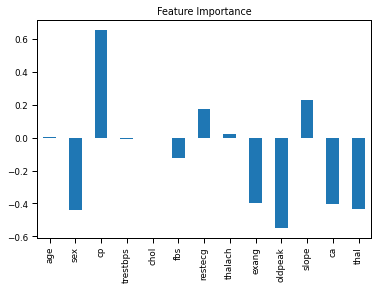

In [101]:
sns.set_context("paper")
feature_df.T.plot.bar(title='Feature Importance',legend=False)

In [104]:
pd.crosstab(df['sex'],df['target'])

target    0   1
sex            
0        24  72
1       114  93

<AxesSubplot:xlabel='slope'>

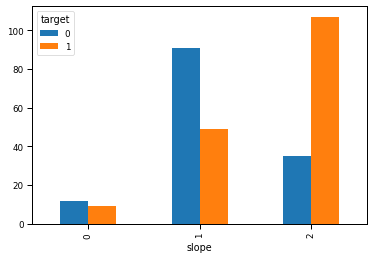

In [111]:
pd.crosstab(df['slope'],df['target']).plot.bar()

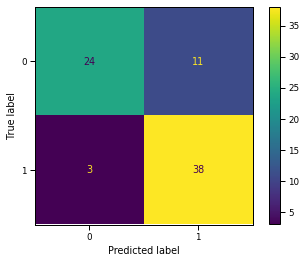

In [109]:
plot_confusion_matrix(clf,X_test,y_test)

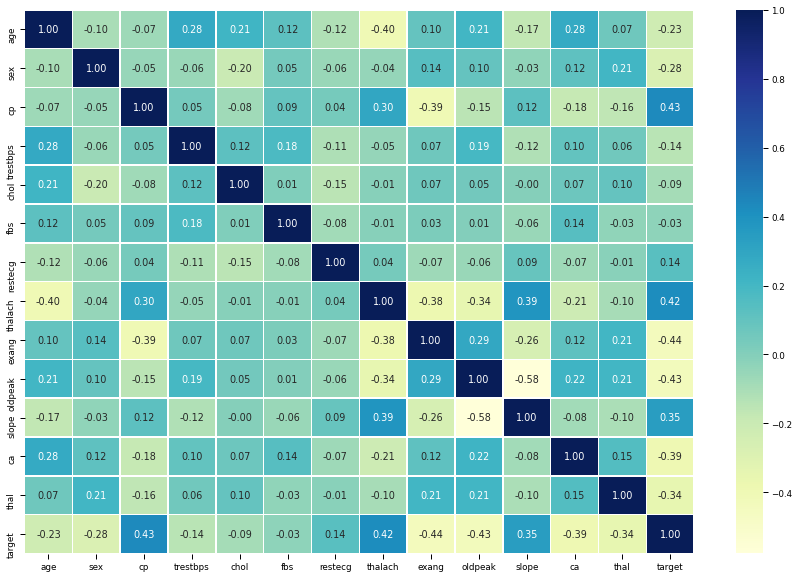

In [112]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt='.2f',cmap='YlGnBu')

### Experimentation

* Get more data
* Find a new model CatBoost